# Shopify Intern Chalange Fall 2022

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

Here i will load the data set and sort it by order_amount column. Right away you see that the range for order_amount is very large.

In [84]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.sort_values(by='order_amount')


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
158,159,92,795,90,1,credit_card,2017-03-29 3:07:12
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
4760,4761,92,937,90,1,debit,2017-03-20 7:37:28
4923,4924,92,965,90,1,credit_card,2017-03-09 5:05:11
4932,4933,92,823,90,1,credit_card,2017-03-24 2:17:13
...,...,...,...,...,...,...,...
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00


Here I am looking at different descriptive statistics. The 50% row is equivalant to the median. You can see the calculated value from the question as the mean for order_amount column.

In [85]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Here I graphed a histogam. The data was heavly skewed to the right. I used a logrithmic scale to better represent the data on the histogram. 
I also ploted a vertical line representing the mean and a vertical line representing the median. You can see that the large values are pulling
the mean to the right.

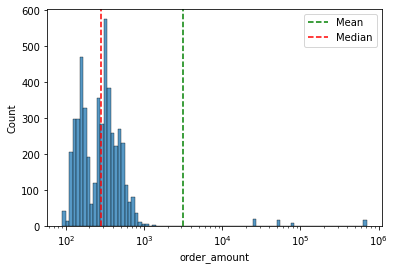

Mean: 3145.0
Median: 284.0


In [86]:
log_graph = sns.histplot(df, x='order_amount', log_scale=True)
Log_mean_line = log_graph.axvline(np.mean(df['order_amount']), ls='--', color='green')
log_median_line = log_graph.axvline(np.median(df['order_amount']), ls='--', color='red')
log_graph.legend(['Mean', 'Median'])
plt.show()
mean = np.mean(df['order_amount'])
median = np.median(df['order_amount'])
print(f'Mean: {mean.round()}\nMedian: {median}')

Here I cut out the outliers by removing all values that are larger than the 0.98 quantile. I plotted the median and mean of this new dataset as vertical lines. This will allow the mean to be a better respresentation of the data. I would still use the median as a value to represent the data.

In [96]:
q = df['order_amount'].quantile(0.98)
df_outlier_removed = df[df['order_amount'] < q].sort_values(by='order_amount')


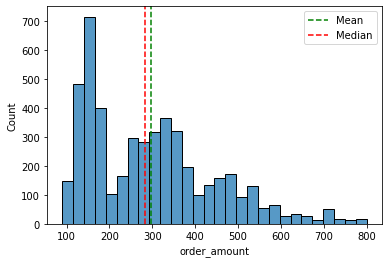

Mean: 298.0
Median: 284.0


In [88]:
graph = sns.histplot(df_outlier_removed, x='order_amount')
mean_line = graph.axvline(np.mean(df_outlier_removed['order_amount']), ls='--', color='green')
median_line = graph.axvline(np.median(df_outlier_removed['order_amount']), ls='--', color='red')
graph.legend(['Mean', 'Median'])
plt.show()

mean = np.mean(df_outlier_removed['order_amount'])
median = np.median(df_outlier_removed['order_amount'])
print(f'Mean: {mean.round()}\nMedian: {median}')